In [1]:
import pandas as pd

In [2]:
load_dataset = pd.read_excel("Expanded_ST_R_With_GAN.xlsx")

In [3]:
load_dataset.head()

,Tablet per box,Early stock,Purchasing,Usage (years),Usage (months),Usage (days),Purchasing base price,Safety Stock,Left Stock,Total of Stagnant Drugs,...,Unit_Botol,Unit_Pen,Unit_Strip,Unit_Tablet,Unit_Vial,Category_Expired,Drug_Name_Label,expired_month,expired_year,synthetic
0,0.292929,0.011429,0.013846,0.003486,0.003486,0.003486,0.006679,0.003486,0.032080,0.031738,...,0,0,0,1,0,1,0,8,2017,0
1,1.000000,0.000000,0.250000,0.191970,0.191970,0.191970,0.001030,0.191970,0.268027,0.171383,...,0,0,0,1,0,0,1,9,2016,0
2,0.292929,0.000000,0.048462,0.044799,0.044799,0.044799,0.004818,0.044799,0.034701,0.011472,...,0,0,0,1,0,0,2,5,2017,0
3,0.000000,0.001429,0.000692,0.000498,0.000498,0.000498,1.000000,0.000498,0.000000,0.000158,...,1,0,0,0,0,0,3,11,2017,0
4,0.040404,0.008413,0.007692,0.007206,0.007206,0.007206,0.017683,0.007206,0.006521,0.003183,...,0,0,0,0,0,0,4,5,2016,0


D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

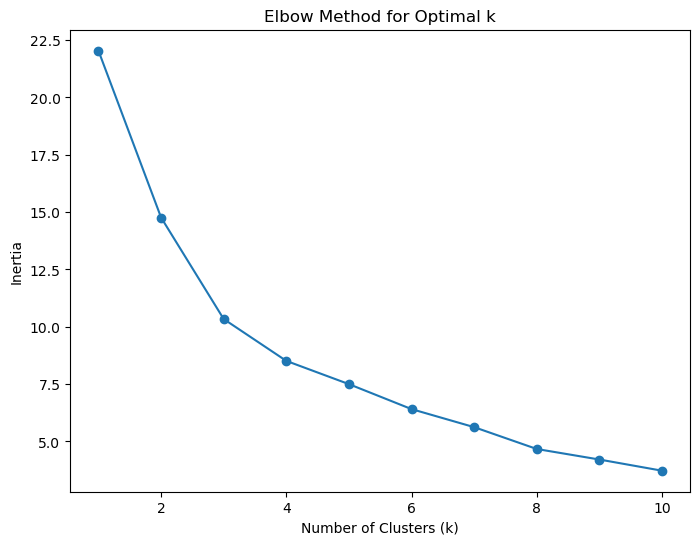

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = load_dataset[['Left Stock', 'Usage (month)', 'months_until_stockout']]
scaled_features = features  # Assuming features are already scaled

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

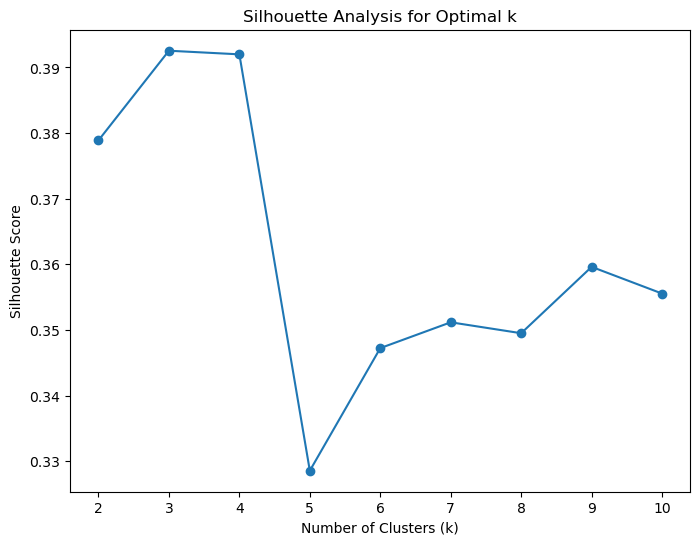

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

features = load_dataset[['Left Stock', 'Usage (month)', 'months_until_stockout']]
scaled_features = features  # Assuming the features are already scaled

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

                   Left Stock  Usage (month)  months_until_stockout
Overstock_Cluster                                                  
0                    0.071383       0.055086               0.074166
1                    0.090246       0.381708               0.030098
2                    0.422502       0.226442               0.137302


D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


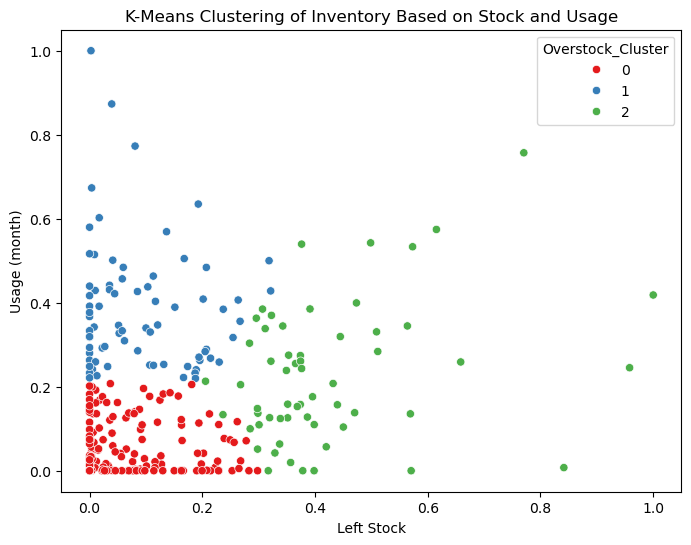

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

features = load_dataset[['Left Stock', 'Usage (month)', 'months_until_stockout']]

kmeans = KMeans(n_clusters=3, random_state=42)
load_dataset['Overstock_Cluster'] = kmeans.fit_predict(features)

print(load_dataset.groupby('Overstock_Cluster')[['Left Stock', 'Usage (month)', 'months_until_stockout']].mean())

plt.figure(figsize=(8,6))
sns.scatterplot(data=load_dataset, x='Left Stock', y='Usage (month)', hue='Overstock_Cluster', palette='Set1')
plt.xlabel('Left Stock')
plt.ylabel('Usage (month)')
plt.title('K-Means Clustering of Inventory Based on Stock and Usage')
plt.show()

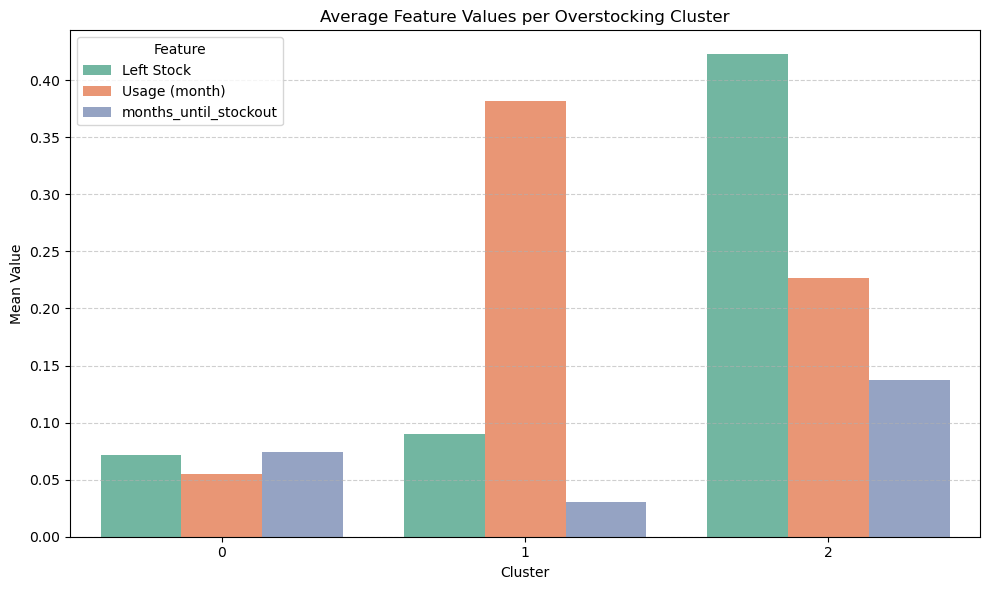

In [10]:
# Group by the cluster and calculate mean values for the selected features
cluster_profile = load_dataset.groupby('Overstock_Cluster')[['Left Stock', 'Usage (month)', 'months_until_stockout']].mean().reset_index()

# Reshape the DataFrame for plotting
cluster_profile_melted = cluster_profile.melt(id_vars='Overstock_Cluster', 
                                               var_name='Feature', 
                                               value_name='Mean Value')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_profile_melted, 
            x='Overstock_Cluster', 
            y='Mean Value', 
            hue='Feature', 
            palette='Set2')

# Plot styling
plt.title('Average Feature Values per Overstocking Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.legend(title='Feature')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
load_dataset['Overstock_Cluster'] = kmeans.labels_
load_dataset.to_csv("overstock_clusters.csv", index=False)

D:\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


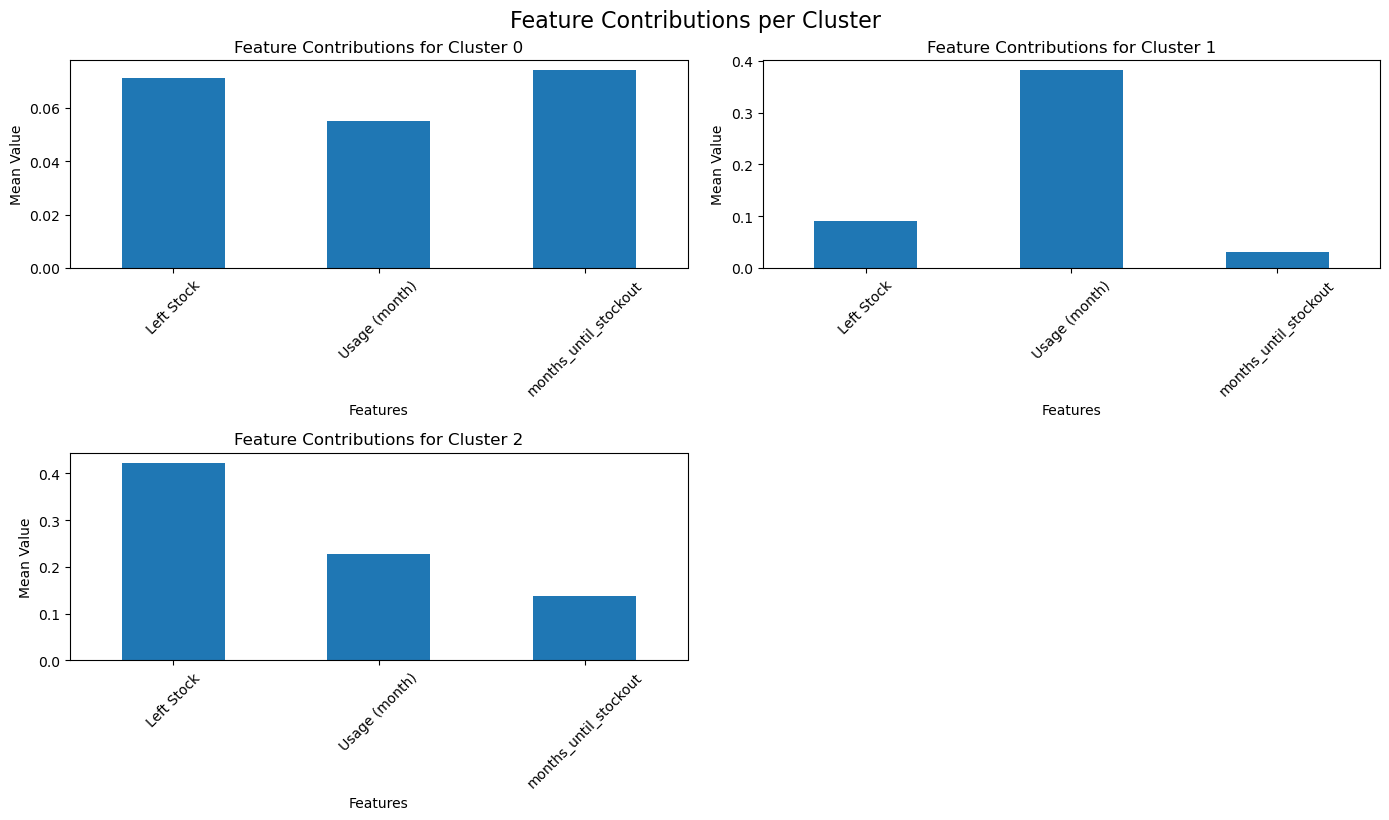

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

clustered_df = scaled_features.copy()
clustered_df['Cluster'] = kmeans_labels

feature_contributions = {}
for cluster_num in range(k):
    cluster_data = clustered_df[clustered_df['Cluster'] == cluster_num]
    feature_contributions[cluster_num] = cluster_data.drop('Cluster', axis=1).mean()

rows = (k + 1) // 2
cols = 2 if k > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten() if k > 1 else [axes]

for idx, (cluster_num, contributions) in enumerate(feature_contributions.items()):
    contributions.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Feature Contributions for Cluster {cluster_num}')
    axes[idx].set_xlabel('Features')
    axes[idx].set_ylabel('Mean Value')
    axes[idx].tick_params(axis='x', rotation=45)

for j in range(len(feature_contributions), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Feature Contributions per Cluster', fontsize=16, y=1.02)
plt.show()